In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
#prepare data set
#kaggle.com
import pandas as pd
import numpy as np
import matplotlib as plt
# Reading the dataset from LOCAL PC / Google Colab can’t read your local PC file!
df1=pd.read_excel("/content//drive/MyDrive/Airline_project/Airline-data.XLSX",sheet_name=0)
df2=pd.read_excel("/content//drive/MyDrive/Airline_project/Airline-data.XLSX",sheet_name=1)

In [37]:
#Show the first 5 rows
df1.head(5)

,DepartureDate,DayOfWeek,Sector,CarrierCode,FlightNumber,DepartureTime,Capacity,BookedPax,FareRevenue,AncillaryRevenue,NoShowPax
0,2015-04-06,Mon,HKGCTS,AB,7000,09:00:00,174,127,115700,24800,7
1,2015-04-06,Mon,CTSHKG,AB,7001,15:00:00,174,161,151900,28600,2
2,2015-04-06,Mon,HKGCTS,AB,7100,12:00:00,174,151,118900,21300,10
3,2015-04-06,Mon,CTSHKG,AB,7101,18:00:00,174,154,137300,26100,1
4,2015-04-07,Tue,HKGCTS,AB,7000,09:00:00,180,143,86100,17900,11


In [38]:
df2.head(5)

,FlightNumber,WeeksPrior,Channel,NewBookings
0,7000,0,Website,213
1,7000,0,OTA,10
2,7000,0,GDS,135
3,7000,1,Website,194
4,7000,1,OTA,15


In [39]:
#Show the last 5 rows
df1.tail(5)

,DepartureDate,DayOfWeek,Sector,CarrierCode,FlightNumber,DepartureTime,Capacity,BookedPax,FareRevenue,AncillaryRevenue,NoShowPax
167,2015-05-17,Sun,CTSHKG,AB,7101,18:00:00,174,126,99900,26700,10
168,2015-05-18,Mon,HKGCTS,AB,7000,09:00:00,180,151,80100,19600,9
169,2015-05-18,Mon,CTSHKG,AB,7001,15:00:00,180,164,91300,27400,1
170,2015-05-18,Mon,HKGCTS,AB,7100,12:00:00,174,129,70300,16000,8
171,2015-05-18,Mon,CTSHKG,AB,7101,18:00:00,174,182,139900,33200,1


In [40]:
df2.tail(5)

,FlightNumber,WeeksPrior,Channel,NewBookings
415,7101,41,OTA,2
416,7101,41,GDS,1
417,7101,42,Website,32
418,7101,42,OTA,3
419,7101,42,GDS,0


In [41]:
#Show the basic statistical details
df1.describe()

,FlightNumber,Capacity,BookedPax,FareRevenue,AncillaryRevenue,NoShowPax
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,7050.500000,177.488372,148.953488,92679.651163,25034.302326,8.267442
std,50.148493,2.968624,14.913322,30762.985541,5740.870004,3.681547
min,7000.000000,174.000000,112.000000,30900.000000,12700.000000,1.000000
25%,7000.750000,174.000000,139.000000,71575.000000,20550.000000,5.000000
50%,7050.500000,180.000000,149.000000,91050.000000,24650.000000,10.000000
75%,7100.250000,180.000000,159.000000,111050.000000,29125.000000,11.000000
max,7101.000000,180.000000,191.000000,195900.000000,42700.000000,14.000000


In [42]:
df2.describe()

,FlightNumber,WeeksPrior,NewBookings
count,420.000000,420.000000,420.00000
mean,7061.928571,17.914286,61.00000
std,48.736980,11.553437,78.34612
min,7000.000000,0.000000,0.00000
25%,7001.000000,8.000000,8.00000
50%,7100.000000,17.000000,21.00000
75%,7101.000000,26.000000,94.75000
max,7101.000000,42.000000,320.00000


array([[<Axes: title={'center': 'DepartureDate'}>,
        <Axes: title={'center': 'FlightNumber'}>,
        <Axes: title={'center': 'Capacity'}>],
       [<Axes: title={'center': 'BookedPax'}>,
        <Axes: title={'center': 'FareRevenue'}>,
        <Axes: title={'center': 'AncillaryRevenue'}>],
       [<Axes: title={'center': 'NoShowPax'}>, <Axes: >, <Axes: >]],
      dtype=object)

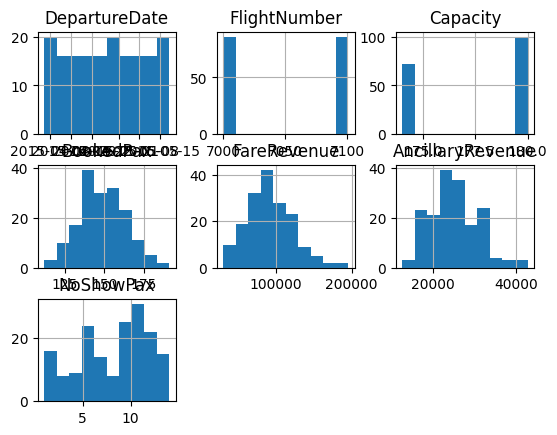

In [43]:
#Draw a histogram of each numerical column
df1.hist()

array([[<Axes: title={'center': 'FlightNumber'}>,
        <Axes: title={'center': 'WeeksPrior'}>],
       [<Axes: title={'center': 'NewBookings'}>, <Axes: >]], dtype=object)

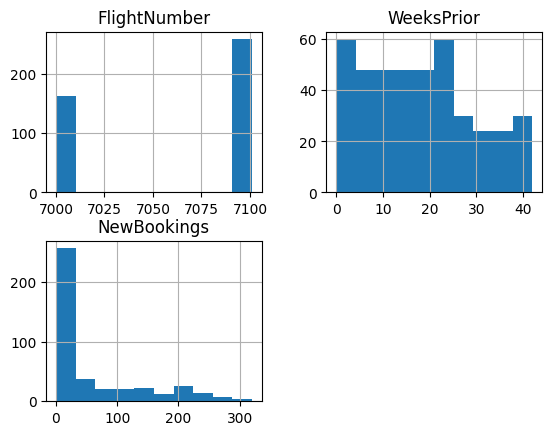

In [44]:
df2.hist()

In [45]:
# Check the missing values
df1.apply(lambda x: sum(x.isnull()),axis = 0)

DepartureDate       0
DayOfWeek           0
Sector              0
CarrierCode         0
FlightNumber        0
DepartureTime       0
Capacity            0
BookedPax           0
FareRevenue         0
AncillaryRevenue    0
NoShowPax           0
dtype: int64

In [46]:
df2.apply(lambda x: sum(x.isnull()),axis = 0)

FlightNumber    0
WeeksPrior      0
Channel         0
NewBookings     0
dtype: int64

In [47]:
#Describe of Lord Factors
load_factors = map(lambda x,y:x/y, df1['BookedPax'], df1['Capacity'])
df1['Lord_Factors'] = list(load_factors)
average_fares = map(lambda x,y:x/y, df1['FareRevenue'], df1['BookedPax'])
df1['Average_Fare'] = list(average_fares)
total_revenue_per_seat = map(lambda x,y,z:(x+y)/z, df1['FareRevenue'],\
                             df1['AncillaryRevenue'], df1['Capacity'])
df1['Total_Revenue_per_Seat'] = list(total_revenue_per_seat)
df1['Lord_Factors'].describe()

count    172.000000
mean       0.839338
std        0.084060
min        0.627778
25%        0.777778
50%        0.838889
75%        0.890278
max        1.097701
Name: Lord_Factors, dtype: float64

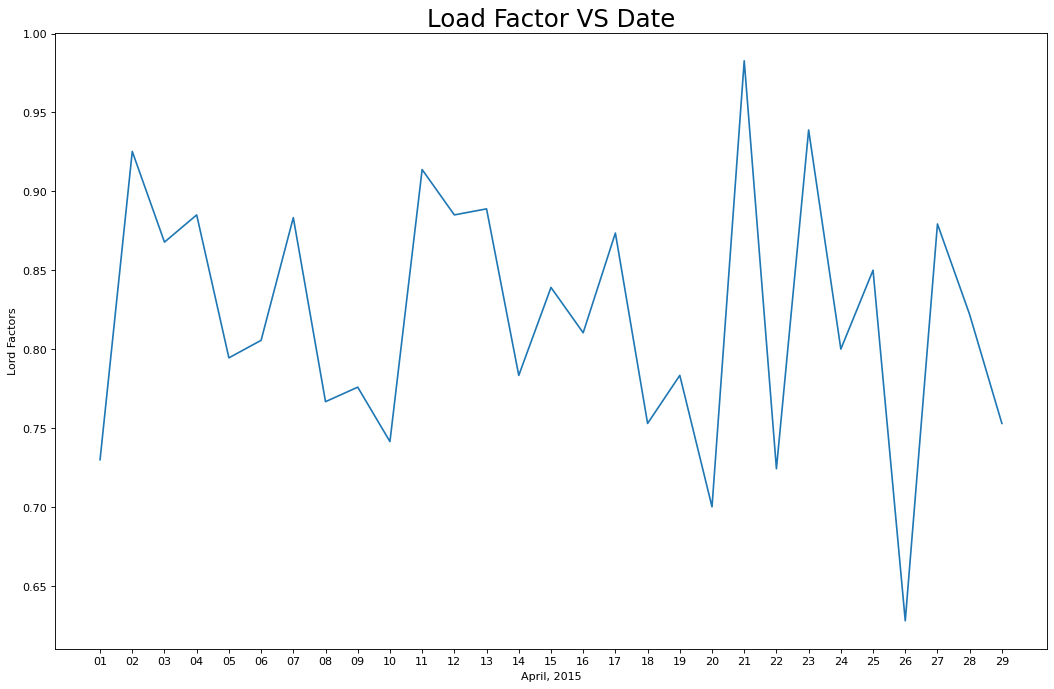

In [48]:
#Draw line chart timeline of Lord Factors
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
plt.figure(figsize=(16,10), dpi= 80)

from datetime import timedelta, datetime

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

period = list()
start_date = datetime(year=2015, month=4, day=1)
end_date = datetime(year=2015, month=4, day=30)

for single_date in daterange(start_date, end_date):
    value = single_date.strftime("%d")

    period.append(value)
df3 = pd.DataFrame({'Period':period})
df3['Lord_Factors'] = df1['Lord_Factors']
plt.plot('Period', 'Lord_Factors',data = df3, color='tab:blue')

plt.title("Load Factor VS Date", fontsize=22)
plt.xlabel("April, 2015")
plt.ylabel("Lord Factors")
plt.show()

In [49]:
#Describe of Average Fare
df1['Average_Fare'].describe()

count     172.000000
mean      617.131367
std       178.946280
min       219.148936
25%       494.806983
50%       600.670163
75%       730.999711
max      1159.171598
Name: Average_Fare, dtype: float64

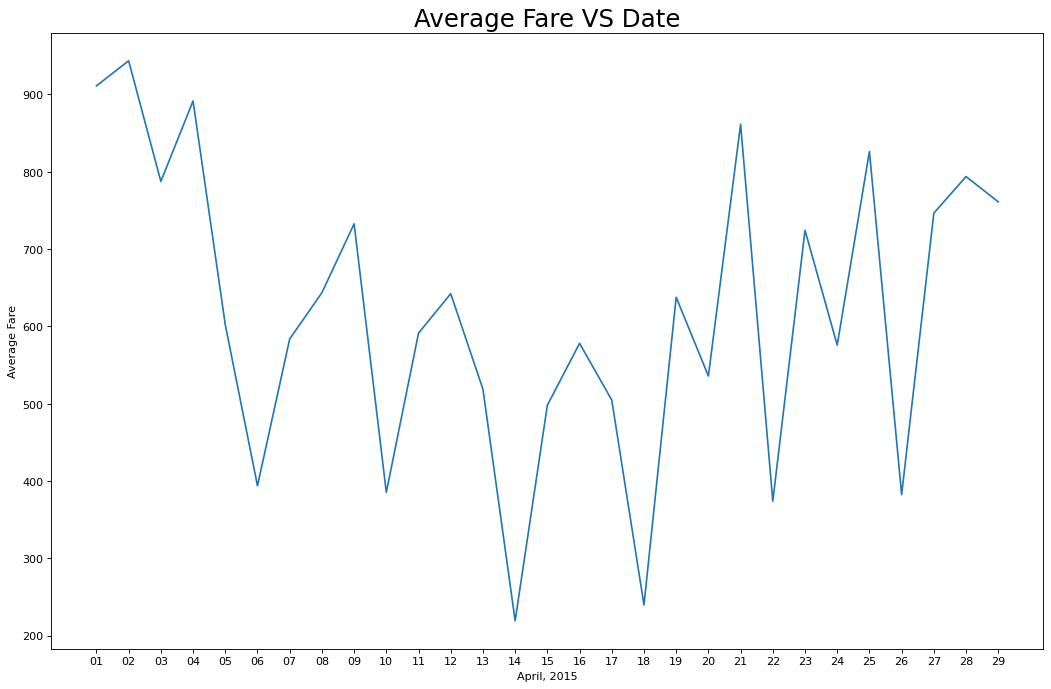

In [50]:
#Draw line chart timeline of Average Fare
period = list()
start_date = datetime(year=2015, month=4, day=1)
end_date = datetime(year=2015, month=4, day=30)

for single_date in daterange(start_date, end_date):
    value = single_date.strftime("%d")

    period.append(value)
df3 = pd.DataFrame({'Period':period})
df3['Average_Fare'] = df1['Average_Fare']

plt.figure(figsize=(16,10), dpi= 80)
plt.plot('Period', 'Average_Fare',data = df3, color='tab:blue')

plt.title("Average Fare VS Date", fontsize=22)
plt.xlabel("April, 2015")
plt.ylabel("Average Fare")
plt.show()

In [51]:
#Describe of Total Revenue per Seat
df1['Total_Revenue_per_Seat'].describe()

count     172.000000
mean      663.141317
std       195.367978
min       280.459770
25%       520.000000
50%       655.373563
75%       781.465517
max      1323.888889
Name: Total_Revenue_per_Seat, dtype: float64

In [52]:
#Pivot table of Averge of No Show Pax, Averge of Average Fare, Averge of Lord Factors
table1 = df1.groupby('Sector')[['NoShowPax', 'Average_Fare','Lord_Factors']].mean()

table2 = df1.pivot_table(values=['NoShowPax', 'Average_Fare','Lord_Factors'],index=['Sector']).mean()
table2 = table2.to_frame()
table2 = table2.T

cat=['NoShowPax', 'Average_Fare','Lord_Factors']

table3 = table2.reindex(cat, axis=1)
table1.loc['Grand Total']=table3. iloc[0]
table1.columns =['Averge of NoShowPax', 'Averge of Average_Fare','Averge of Lord_Factors'] 
pd.set_option('display.max_columns', None)
print(table1)


             Averge of NoShowPax  Averge of Average_Fare  \
Sector                                                     
CTSHKG                  8.058140              606.945647   
HKGCTS                  8.476744              627.317086   
Grand Total             8.267442              617.131367   

             Averge of Lord_Factors  
Sector                               
CTSHKG                     0.835868  
HKGCTS                     0.842807  
Grand Total                0.839338  


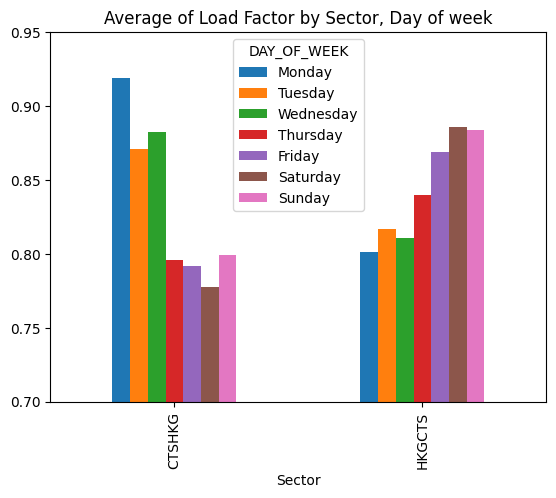

In [53]:
#Histogram of Average of Load Factor by Sector, Day of week
from datetime import date
import calendar
def weekday(my_date):
  my_date = calendar.day_name[my_date.weekday()]
  return my_date
  #[ 0 : 3 ]
week = list()
for date in df1["DepartureDate"]:
  week.append(weekday(date))

df1['DAY_OF_WEEK'] = week
df1['DAY_OF_WEEK'] = pd.Categorical(df1['DAY_OF_WEEK'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

table1=df1.pivot_table('Lord_Factors', ['Sector'], 'DAY_OF_WEEK')
bar1 = table1.plot(kind='bar')
bar1.set_ylim([0.7,0.95])
plt.title('Average of Load Factor by Sector, Day of week')

plt.show()

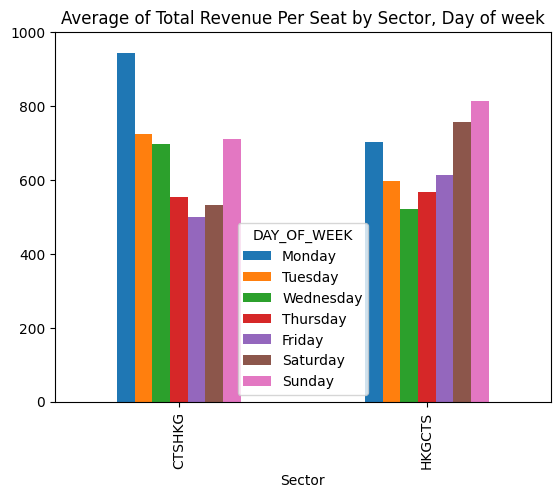

In [54]:
#Histogram of Average of Total Revenue Per Seat by Sector, Day of week
#Bar chart of Average of Load Factor by Sector, Day of week
table1=df1.pivot_table('Total_Revenue_per_Seat', ['Sector'], 'DAY_OF_WEEK')
bar1 = table1.plot(kind='bar')
bar1.set_ylim([0,1000])
plt.title('Average of Total Revenue Per Seat by Sector, Day of week')

plt.show()

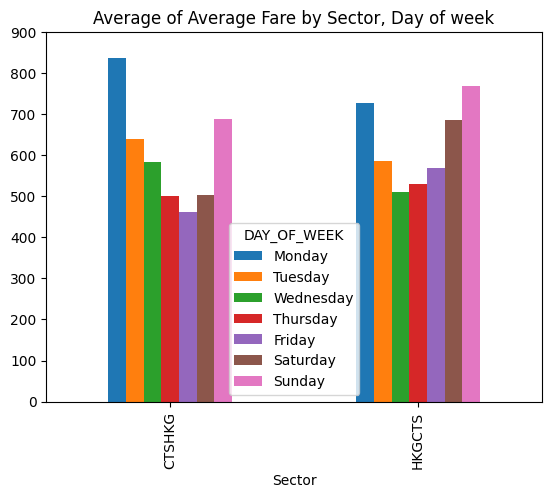

In [55]:
#Histogram of Average of Average Fare by Sector, Day of week
table1=df1.pivot_table('Average_Fare', ['Sector'], 'DAY_OF_WEEK')
bar1 = table1.plot(kind='bar')
bar1.set_ylim([0,900])
plt.title('Average of Average Fare by Sector, Day of week')

plt.show()

In [56]:
#Table of Average of LordFactors, Average of AverageFare,Average of TotalRevenuePerSeat
table2 = df1.groupby('DepartureTime')[['Lord_Factors', 'Average_Fare','Total_Revenue_per_Seat']].mean()
table2.columns=['Average of LordFactors', 'Average of AverageFare','Average of TotalRevenuePerSeat']
table2.index = ['7000(HKCTS)(9:00)', '7001(CTSHK)(5:00)', '7100(HKCTS)(12:00)', '7101(CTSHK)(18:00)'] 
print(table2)

                    Average of LordFactors  Average of AverageFare  \
7000(HKCTS)(9:00)                 0.852544              643.523894   
7001(CTSHK)(5:00)                 0.833070              611.110278   
7100(HKCTS)(12:00)                0.826477              493.321038   
7101(CTSHK)(18:00)                0.845260              720.570256   

                    Average of TotalRevenuePerSeat  
7000(HKCTS)(9:00)                       675.363985  
7001(CTSHK)(5:00)                       632.690903  
7100(HKCTS)(12:00)                      560.688764  
7101(CTSHK)(18:00)                      783.821616  


Axes(0.125,0.11;0.775x0.77)


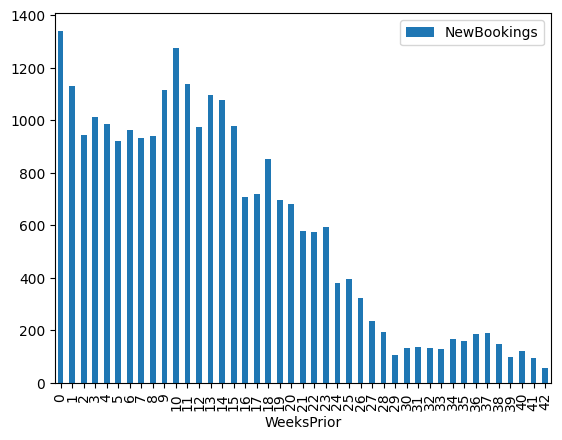

In [57]:
#Histogram of WeeksPrior
table3 = df2.groupby('WeeksPrior')[['NewBookings']].sum()
bar2 = table3.plot(kind='bar')
print(bar2)

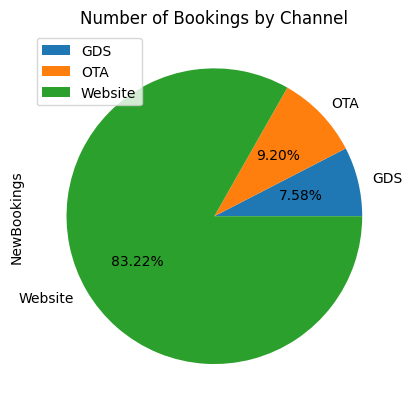

In [58]:
#Draw Pie chart of Number of Bookings by Channel
table4 = df2.groupby('Channel')[['NewBookings']].sum()
fig = plt.figure()
ax1 = fig.add_subplot(111)

table4.plot(kind='pie',autopct='%1.2f%%',ax=ax1,subplots=True)
ax1.set_title("Number of Bookings by Channel")
ax1.legend(loc='best')
plt.show()

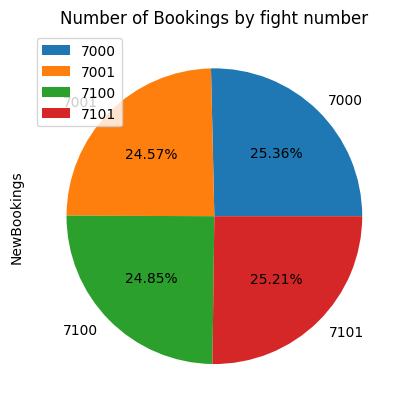

In [59]:
#Draw Pie chart of Number of Bookings by fight number
table5 = df2.groupby('FlightNumber')[['NewBookings']].sum()
fig = plt.figure()
ax1 = fig.add_subplot(111)

table5.plot(kind='pie',autopct='%1.2f%%',ax=ax1,subplots=True)
ax1.set_title("Number of Bookings by fight number")
ax1.legend(loc='best')

plt.show()

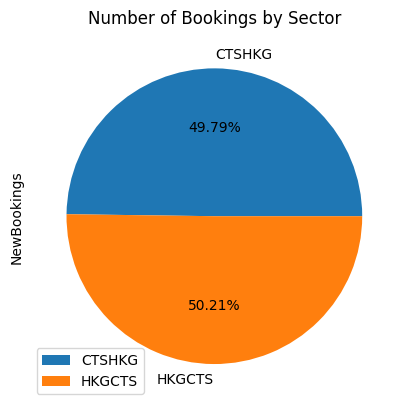

In [60]:
#Draw Pie chart of Number of Bookings by Sector
import matplotlib.pyplot as plt
d= {7000:'HKGCTS',7001:'CTSHKG',7100:'HKGCTS',7101:'CTSHKG'}
df2['Sector'] = df2['FlightNumber'].map(d)
table6 = df2.groupby('Sector')[['NewBookings']].sum()
fig = plt.figure()
ax2 = fig.add_subplot(111)
table6.plot(kind='pie',autopct='%1.2f%%',ax=ax2,subplots=True)
ax2.set_title("Number of Bookings by Sector")
ax2.legend(loc='best')

plt.show()

Ancillary revence

In [61]:
#Describe of % of Ancillary Revenue in Total Revenue
ARinTR = map(lambda x,y,z:x/(y*z), df1['AncillaryRevenue'], df1['Total_Revenue_per_Seat'],df1['Capacity'])
df1['AncillaryRevenueInTotalRevenue']=list(ARinTR)
df1['AncillaryRevenueInTotalRevenue'].describe()

count    172.000000
mean       0.221395
std        0.050095
min        0.138331
25%        0.186829
50%        0.210668
75%        0.245934
max        0.433028
Name: AncillaryRevenueInTotalRevenue, dtype: float64

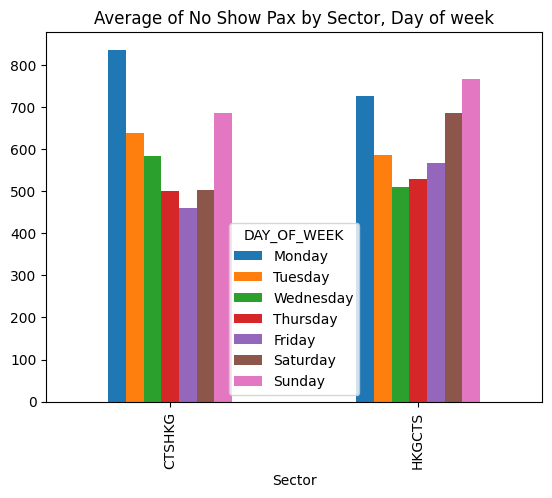

       NoShowPax                                                
           count      mean       std  min  25%   50%   75%   max
Sector                                                          
CTSHKG      86.0  8.058140  3.974491  1.0  5.0  10.0  11.0  14.0
HKGCTS      86.0  8.476744  3.373693  2.0  6.0   9.0  11.0  14.0


In [62]:
#Draw histogram of Average of No Show Pax by Sector, Day of week
#Describe of NoShowPax
table7=df1.pivot_table('NoShowPax', ['Sector'], 'DAY_OF_WEEK')
bar3 = table1.plot(kind='bar')
plt.title('Average of No Show Pax by Sector, Day of week')

plt.show()

table8=df1.groupby('Sector')[['NoShowPax']].describe()
print(table8)

Maximizing total revenue schedule

In [63]:
#Table of Total Revenue group by Sector, day of week and fight number
total_revenue= map(lambda x,y:x+y, df1['FareRevenue'],df1['AncillaryRevenue'])
df1['Total_Revenue']= list(total_revenue)
table9=df1.groupby(['Sector','DAY_OF_WEEK','FlightNumber'])[['Total_Revenue']].mean()
table9=table9.dropna()
print(table9)

                                 Total_Revenue
Sector DAY_OF_WEEK FlightNumber               
CTSHKG Monday      7001          147842.857143
                   7101          186228.571429
       Tuesday     7001          109800.000000
                   7101          149816.666667
       Wednesday   7001          107533.333333
                   7101          139066.666667
       Thursday    7001           80000.000000
                   7101          116583.333333
       Friday      7001           72916.666667
                   7101          103683.333333
       Saturday    7001           69866.666667
                   7101          118366.666667
       Sunday      7001           99550.000000
                   7101          153333.333333
HKGCTS Monday      7000          124785.714286
                   7100          124000.000000
       Tuesday     7000          106483.333333
                   7100          107433.333333
       Wednesday   7000           95700.000000
             

<Axes: >

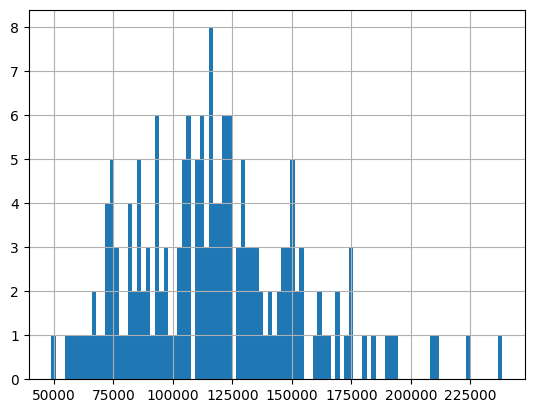

In [64]:
#Draw histogram of Total Revenue with bins size =100
df1['Total_Revenue'].hist(bins=100)

<Axes: >

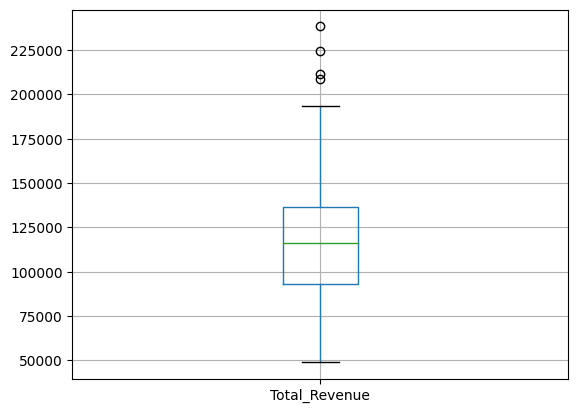

In [65]:
#Draw a boxplot of Total Revenue to show the quartiles
df1.boxplot(column='Total_Revenue')

Predictive Analysis

In [66]:
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

<ipython-input-67-ce11d6dbfeb3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()['Total_Revenue'].sort_values()
<ipython-input-67-ce11d6dbfeb3>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


<Axes: >

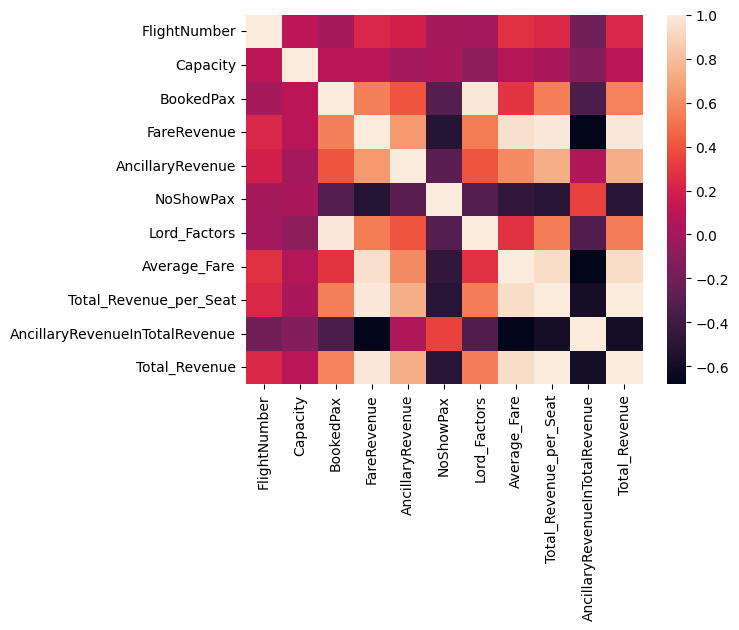

In [67]:
#Draw a heatmap to find the correlation of each column
df1.corr()['Total_Revenue'].sort_values()

corr = df1.corr()
sns.heatmap(corr)
#1.'NoShowPax' and 'Total_Revenue' have significant negetive correlation

In [68]:
#Linear Regression of 'NoShowPax' and 'Total_Revenue'

#create x and y

feature_cols = 'NoShowPax'
x=df1[feature_cols]
y=df1.Total_Revenue

In [69]:
#Split the training and test sets

x_train,x_test,y_train,y_test = train_test_split(
    x, y, test_size=0.2
)
x_train=x_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)
x_test=x_test.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

inteercept =  [157725.35574028]
coefficient =  [[-4722.27853994]]


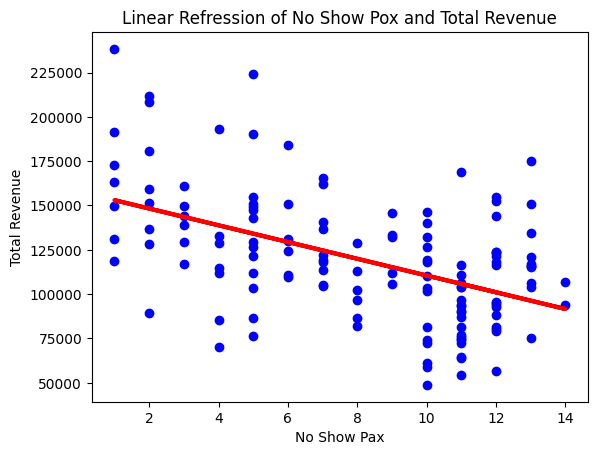

In [70]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, linreg.predict(x_train), color='red', linewidth=3)

plt.xlabel('No Show Pax')
plt.ylabel('Total Revenue')
plt.title('Linear Refression of No Show Pox and Total Revenue')

print('inteercept = ', linreg.intercept_)
print('coefficient = ', linreg.coef_)

In [71]:
#Manually enter the No Show Pax to predict

NoShowPax = 20
Total_Revenue = linreg.intercept_ + NoShowPax*linreg.coef_
linreg.predict([[NoShowPax]])

array([[63279.78494139]])

In [72]:
#Linear Regression of DayOfWeek

X = df1[['DayOfWeek','Sector','DepartureTime']] 
Y = df1['Total_Revenue']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, Y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)
coef_dict = dict(zip(X_encoded.columns,reg.coef_))

coef_dict

{'DayOfWeek_Fri': -17559.48457995539,
 'DayOfWeek_Mon': 31495.72298546204,
 'DayOfWeek_Sat': -8563.584206862619,
 'DayOfWeek_Sun': 17317.50281001173,
 'DayOfWeek_Thu': -18195.52949246102,
 'DayOfWeek_Tue': 4314.7421296428165,
 'DayOfWeek_Wed': -8809.369645837583,
 'Sector_CTSHKG': 872.0481625795788,
 'Sector_HKGCTS': -872.0481625795751,
 'DepartureTime_09:00:00': -389.13248431388183,
 'DepartureTime_12:00:00': -482.91567826569553,
 'DepartureTime_15:00:00': -21203.29418448949,
 'DepartureTime_18:00:00': 22075.34234706906}